# Universal Sentence Encoder

Universal Sentence Encoder, USE is a pretrained encoder model that generates sentence embeddings perserving the meaning of the sentences and relationships between the sentences than just the individual words, unlike where generating sentence embeddings from word embeddings from models GloVe or Word2Vec by summing up and averaging them , cause loss of meaning of the sentences. 

USE encodes not-fixed length unstructured sentence into high dimensional vetor of fixed size 512. Word, sentence, or list of sentences (short paragraph) are accepted as input to USE model.

Universal Sentence encoder model has two variants which trade off between accuracy and computing power

1. Transformer architure : this gives high accuracy but computational intensive.
It has computation complexity of O(n-Squared) where n is length of the sentence.

2. Deep Averaging Network:  this gives little reduced accuracy but computation is fast.It has computation complexity of O(n) where n is lenth of sentence.

## Benefits of USE: 

USE sentence embeddings can be used for sentence similarity and sentence classification tasks and other NLP tasks

The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.

## Transformer Architeure based Model:
The transformer based sentence encoding model constructs sentence embeddings using the encoding sub-graph of the transformer architecture(Vaswani et al., 2017). This sub-graph uses attention to compute context aware representations of words in a sentence that take into account both the ordering and identity of all the other words.
The context aware word representations are converted to a fixed length sentence encoding vector by computing the element-wise sum of the representations at each word position. 
First, the sentences are converted to lowercase and tokenized into tokens using the Penn Treebank(PTB) tokenizer before passing to encoder and it outputs 512-dimensional sentence vectors

## Deep Averaging Network (DAN) based Model

The second encoding model makes use of a deep averaging network (DAN) (Iyyer et al.,2015) whereby input embeddings for words and bi-grams are first averaged together and then passed through a feedforward deep neural network
(DNN) to produce sentence embeddings. 

We can load different versions of trained use models using link

https://tfhub.dev/google/collections/universal-sentence-encoder/





 ### Let's dive into implementation for Sentences Semantic similarity in easy approach

In [2]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re    
import seaborn as sns 

In [3]:
# loading Tfhub module of universal sentence encoder
url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
use_model = hub.load(url)  # loading the tensorflow use model

In [4]:
logging.set_verbosity(logging.ERROR)  #to log only errors

In [5]:
#Define a function for computing sentence embedding of input string
def embed(input):
   return use_model(input)

In [6]:
#how sentence embedding is computed for a word, sentence and paragraph
word = "Anaconda"    #word
sen = "Tiger is India's national animal."  #sentence
#paragraph
para = ("Universal Sentence Encoder embeddings also support short paragraphs. "
     "There is no hard limit on how long the paragraph is. ")   #long length sentences ,paragraph
msgs = [word, sen, para] 

In [7]:
messages_embeddings = embed(msgs)

In [8]:
# check shape of embeddings
np.array(messages_embeddings).shape

(3, 512)

In [12]:
for i, embedding in enumerate(np.array(messages_embeddings).tolist()):
   print("Msg: {}".format(msgs[i]))     #print the message
   print("Embedding size: {}".format(len(embedding)))    #print size of the embedding
   embedding_snippet = ", ".join(str(x) for x in embedding[:3])   #printing smaller snippet of embedding
   print("Embedding: [{}, ...]\n".format(embedding_snippet))

Msg: Anaconda
Embedding size: 512
Embedding: [0.04067634791135788, -0.011776651255786419, 0.037171412259340286, ...]

Msg: Tiger is India's national animal.
Embedding size: 512
Embedding: [-0.0414583645761013, -0.024032078683376312, -0.017102980986237526, ...]

Msg: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. 
Embedding size: 512
Embedding: [0.0006103708874434233, -0.07061166316270828, 0.03415067493915558, ...]



## 2. 


The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [20]:
def plot_similarity(labels, features, rotation):
#compute inner product of the encodings
   corr = np.inner(features, features) 
   sns.set(font_scale=1.2)  
   g = sns.heatmap(  #plot heatmap 
       corr,  #computed inner product
       xticklabels=labels, #label the axes with input sentences
       yticklabels=labels,
 #vmin and vmax are values to anchor the colormap
       vmin=0,
       vmax=1,
       cmap="YlOrRd") #matplotlib colormap name (here Yellow or Red)
   g.set_xticklabels(labels, rotation=rotation) 
   g.set_title("Semantic Textual Similarity") 

In [18]:
 def run_and_plot(msgs):
   message_embeddings = embed(msgs)
   plot_similarity(msgs, message_embeddings, 90)

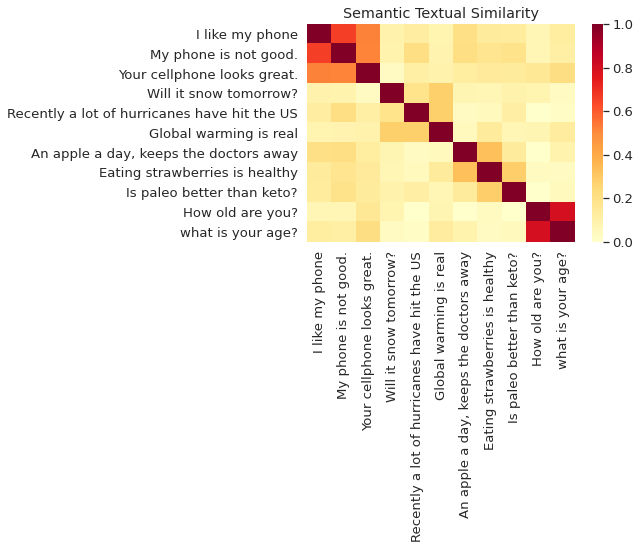

In [19]:
messages = [
     # Smartphones
     "I like my phone",
     "My phone is not good.",
     "Your cellphone looks great.",
     # Weather
     "Will it snow tomorrow?",
     "Recently a lot of hurricanes have hit the US",
     "Global warming is real",
     # Food and health
     "An apple a day, keeps the doctors away",
     "Eating strawberries is healthy",
     "Is paleo better than keto?",
     # Asking about age
     "How old are you?",
     "what is your age?",
 ] 


run_and_plot(messages)

## 3.

Running with Tensorflow session which supports non-eager execution



In [21]:
import tensorflow.compat.v1 as tf   #integrating tensorflow version 1.x into version 2.x and disabling the behaviour of version 2.x
tf.disable_v2_behavior() 
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [34]:
# loading Tfhub module of universal sentence encoder
url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
use_model = hub.load(url)  # loading the tensorflow use model

In [35]:
def embed(sentences):     #list of sentences
   return use_model(sentences)

In [40]:
def load_use_encoder(url, messages):

    similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
    similarity_message_encodings = embed(similarity_input_placeholder)

    with tf.Session() as session:
      session.run(tf.global_variables_initializer())
      session.run(tf.tables_initializer())
      output_embeddings=session.run(similarity_message_encodings,{similarity_input_placeholder:messages})

    return output_embeddings

In [41]:
embeddings=load_use_encoder(url, messages)  # pass list of sentences

In [42]:
embeddings.shape

(11, 512)

In [56]:
# Cosine similarity score computtation between sentence embeddings
count_msgs=len(messages)
df_similarscores=pd.DataFrame()

for i in range(count_msgs):
  for j in range(count_msgs):

    dotproduct=np.dot(embeddings[i],embeddings[j])   # vector product
    magnitude_i=np.dot(embeddings[i],embeddings[i])  
    magnitude_j=np.dot(embeddings[j],embeddings[j])  

    costhetha=dotproduct/(magnitude_i * magnitude_j)

    df_similarscores=df_similarscores.append(
        {
            'similarity':costhetha,
              'message1':messages[i],
              'message2':messages[j]
        }, ignore_index=True)

In [57]:
print(df_similarscores[:5])

          message1                                      message2  similarity
0  I like my phone                               I like my phone    1.000000
1  I like my phone                         My phone is not good.    0.661078
2  I like my phone                   Your cellphone looks great.    0.520249
3  I like my phone                        Will it snow tomorrow?    0.092885
4  I like my phone  Recently a lot of hurricanes have hit the US    0.122700


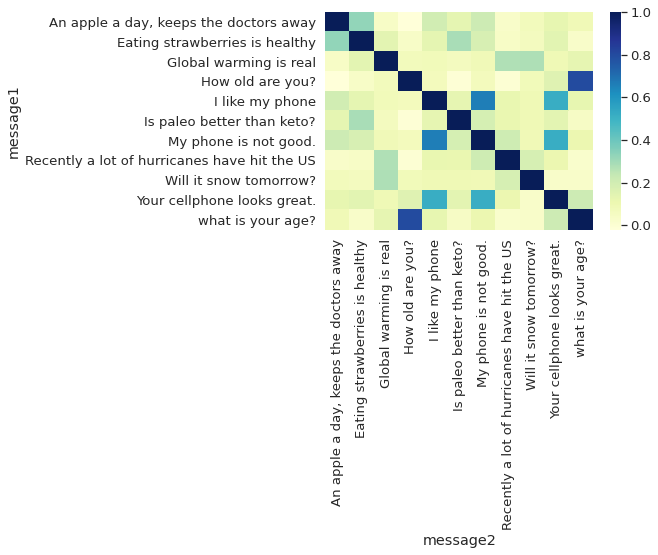

In [61]:
# convert similarity matrix into dataframe
similarity_heatmap = df_similarscores.pivot(index="message1", columns="message2", values="similarity")
# visualize the results
ax = sns.heatmap(similarity_heatmap, cmap="YlGnBu")
plt.show()


In [72]:
#checking for similarity scores of all sentences wrt to single sentence at index 3  'how old are you?'
similarity_heatmap.iloc[4].sort_values(ascending=False)

message2
I like my phone                                 1.000000
My phone is not good.                           0.661078
Your cellphone looks great.                     0.520249
An apple a day, keeps the doctors away          0.200465
Eating strawberries is healthy                  0.136782
Is paleo better than keto?                      0.134210
what is your age?                               0.127277
Recently a lot of hurricanes have hit the US    0.122700
Will it snow tomorrow?                          0.092885
Global warming is real                          0.081469
How old are you?                                0.068059
Name: I like my phone, dtype: float64

In [69]:
# Extracting all thoses sentences which have score greater than threshold.
threshold=0.27

sentences_dictionary={}

count_rows,count_columns=similarity_heatmap.shape   # rows and columns count are same

for i in range(count_rows):
  selected_sents=[]
  sentences_dictionary[similarity_heatmap.index[i]]=''

  for j in range(count_columns):
    if(similarity_heatmap.iloc[i,j]>=threshold  and  similarity_heatmap.iloc[i,j]<1.0):
      selected_sents.append(similarity_heatmap.columns[j])

  sentences_dictionary[similarity_heatmap.index[i]]=selected_sents

In [71]:
count=0
for k,v in sentences_dictionary.items():
  count=count + 1
  print(count, "**************") 
  print(k, ": ", v)

1 **************
An apple a day, keeps the doctors away :  ['Eating strawberries is healthy']
2 **************
Eating strawberries is healthy :  ['An apple a day, keeps the doctors away', 'Is paleo better than keto?']
3 **************
Global warming is real :  ['Recently a lot of hurricanes have hit the US', 'Will it snow tomorrow?']
4 **************
How old are you? :  ['what is your age?']
5 **************
I like my phone :  ['My phone is not good.', 'Your cellphone looks great.']
6 **************
Is paleo better than keto? :  ['Eating strawberries is healthy']
7 **************
My phone is not good. :  ['I like my phone', 'Your cellphone looks great.']
8 **************
Recently a lot of hurricanes have hit the US :  ['Global warming is real']
9 **************
Will it snow tomorrow? :  ['Global warming is real']
10 **************
Your cellphone looks great. :  ['I like my phone', 'My phone is not good.']
11 **************
what is your age? :  ['How old are you?', 'what is your age?']


### References: 
https://amitness.com/2020/06/universal-sentence-encoder/

https://analyticsindiamag.com/guide-to-universal-sentence-encoder-with-tensorflow/

Important for sentence similarity check

https://colab.research.google.com/github/tensorflow/hub/blob/50bbebaa248cff13e82ddf0268ed1b149ef478f2/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb#scrollTo=cPMCaxrZwp7t
